In [1]:
import os
os.getcwd()

os.chdir(os.path.join(os.environ["HOME"], "Code/ExoTiC-NEAT-training/"))

In [2]:
import os

from astropy.io import fits
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image

from exotedrf import stage2, stage3
from exotedrf.utils import fancyprint

os.environ['CRDS_PATH'] = './crds_cache'
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'

WebbPSF not installed. Profile simulation not available.


In [3]:
outdir_s1 = "/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage1/"
outdir_s2 = "/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/"
outdir_s3 = '/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage3/'

background_model = "model_background256.npy"

In [4]:
observation_id = "jw01353101001"

In [5]:
gain_scale_filenames = [outdir_s1 + f"{observation_id}_04101_00001-seg001_nis_gainscalestep.fits",
                        outdir_s1 + f"{observation_id}_04101_00001-seg002_nis_gainscalestep.fits",
                        outdir_s1 + f"{observation_id}_04101_00001-seg003_nis_gainscalestep.fits",
                        outdir_s1 + f"{observation_id}_04101_00001-seg004_nis_gainscalestep.fits",
                        outdir_s1 + f"{observation_id}_04101_00001-seg005_nis_gainscalestep.fits",
                        ]

step = stage2.AssignWCSStep(gain_scale_filenames, output_dir=outdir_s2)

results = step.run(save_results=True, force_redo=True)

2025-08-22 12:45:58,061 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2025-08-22 12:46:00,948 - CRDS - INFO -  Calibration SW Found: jwst 1.17.1 (/home/bi19158/Code/soss-data-reduction/venv/lib/python3.10/site-packages/jwst-1.17.1.dist-info)
2025-08-22 12:46:01,504 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2025-08-22 12:46:01,665 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage1/jw01353101001_04101_00001-seg001_nis_gainscalestep.fits',).
2025-08-22 12:46:01,669 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  sip_approx: True
  sip_max_pix_error

In [6]:
step = stage2.SourceTypeStep(results, output_dir=outdir_s2)

results = step.run(save_results=True, force_redo=True)

2025-08-22 12:46:20,146 - stpipe.SourceTypeStep - INFO - SourceTypeStep instance created.
2025-08-22 12:46:20,869 - stpipe.SourceTypeStep - INFO - SourceTypeStep instance created.
2025-08-22 12:46:21,039 - stpipe.SourceTypeStep - INFO - Step SourceTypeStep running with args ('/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg001_nis_assignwcsstep.fits',).
2025-08-22 12:46:21,042 - stpipe.SourceTypeStep - INFO - Step SourceTypeStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  source_type: None
2025-08-22 12:46:21,905 - stpipe.SourceTypeStep - INFO - Input EXP_TYPE is NIS_SOSS
2025-08-22 12:46:21,906 - stpipe.SourceTypeStep - INFO - Input SRCTYAPT = POINT
2025-08-22 12:46:2

In [7]:
step = stage2.FlatFieldStep(results, output_dir=outdir_s2)

results = step.run(save_results=True, force_redo=True)

2025-08-22 12:46:37,661 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:46:38,338 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:46:38,511 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep running with args ('/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg001_nis_sourcetypestep.fits',).
2025-08-22 12:46:38,514 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  save_interpolated_flat: False
  user_supplied_flat: None
  inverse: False
2025-08-22 12:46:39,533 - stpipe.FlatFieldStep - INFO - Using FLAT reference file: ./crds_cache/references/jwst/niriss/jwst_niriss_fl

2025-08-22 12:46:44.029 - exoTEDRF - INFO - Doing cosmetic NaN interpolation.


2025-08-22 12:48:22,275 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:48:22,922 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:48:23,098 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep running with args ('/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg002_nis_sourcetypestep.fits',).
2025-08-22 12:48:23,101 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  save_interpolated_flat: False
  user_supplied_flat: None
  inverse: False
2025-08-22 12:48:24,087 - stpipe.FlatFieldStep - INFO - Using FLAT reference file: ./crds_cache/references/jwst/niriss/jwst_niriss_fl

2025-08-22 12:48:28.668 - exoTEDRF - INFO - Doing cosmetic NaN interpolation.


2025-08-22 12:50:06,595 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:50:07,243 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:50:07,421 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep running with args ('/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg003_nis_sourcetypestep.fits',).
2025-08-22 12:50:07,424 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  save_interpolated_flat: False
  user_supplied_flat: None
  inverse: False
2025-08-22 12:50:08,364 - stpipe.FlatFieldStep - INFO - Using FLAT reference file: ./crds_cache/references/jwst/niriss/jwst_niriss_fl

2025-08-22 12:50:12.954 - exoTEDRF - INFO - Doing cosmetic NaN interpolation.


2025-08-22 12:51:49,726 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:51:50,388 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:51:50,567 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep running with args ('/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg004_nis_sourcetypestep.fits',).
2025-08-22 12:51:50,570 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  save_interpolated_flat: False
  user_supplied_flat: None
  inverse: False
2025-08-22 12:51:51,568 - stpipe.FlatFieldStep - INFO - Using FLAT reference file: ./crds_cache/references/jwst/niriss/jwst_niriss_fl

2025-08-22 12:51:56.207 - exoTEDRF - INFO - Doing cosmetic NaN interpolation.


2025-08-22 12:53:33,749 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:53:33,932 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-08-22 12:53:34,103 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep running with args ('/data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg005_nis_sourcetypestep.fits',).
2025-08-22 12:53:34,106 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  save_interpolated_flat: False
  user_supplied_flat: None
  inverse: False
2025-08-22 12:53:34,495 - stpipe.FlatFieldStep - INFO - Using FLAT reference file: ./crds_cache/references/jwst/niriss/jwst_niriss_fl

2025-08-22 12:53:34.970 - exoTEDRF - INFO - Doing cosmetic NaN interpolation.


In [8]:
step = stage2.BackgroundStep(results, background_model=background_model,
                             baseline_ints=[150, -100], output_dir=outdir_s2)

results = step.run(save_results=True, differential=True, force_redo=True, do_plot=True)[0]

2025-08-22 12:53:39.574 - exoTEDRF - INFO - Reading background model file: model_background256.npy...
2025-08-22 12:53:39.575 - exoTEDRF - INFO - BackgroundStep instance created.
2025-08-22 12:53:39.576 - exoTEDRF - INFO - Creating reference deep stack.


2025-08-22 12:53:53.458 - exoTEDRF - INFO - Starting SOSS background subtraction step.
2025-08-22 12:53:53.458 - exoTEDRF - INFO - Processing file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg001_nis_flatfieldstep.fits.
2025-08-22 12:53:53.458 - exoTEDRF - INFO - Calculating background model scaling.
2025-08-22 12:53:53.459 - exoTEDRF - INFO - Using differential background scale factors: 0.79972, 0.79055, and shift: 0.00000
2025-08-22 12:53:56.400 - exoTEDRF - INFO - File saved to: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg001_nis_backgroundstep.fits.
2025-08-22 12:53:56.404 - exoTEDRF - INFO - Background model saved to /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001_nis_background.npy.
2025-08-22 12:53:56.517 - exoTEDRF - INFO - Starting SOSS background subtraction step.
2025-08-22 12:53:56.517 - exoTEDRF - INFO - Processing file: /d

In [9]:

step = stage2.BadPixStep(results, baseline_ints=[150, -100], output_dir=outdir_s2)
results = step.run(save_results=True, force_redo=True, do_plot=True,
                              space_thresh=10, time_thresh=10)

2025-08-22 12:55:21.601 - exoTEDRF - INFO - BadPixStep instance created.
2025-08-22 12:55:21.601 - exoTEDRF - INFO - Creating reference deep stack.
2025-08-22 12:55:35.480 - exoTEDRF - INFO - Starting outlier pixel interpolation step.
2025-08-22 12:55:35.645 - exoTEDRF - INFO - Processing file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg001_nis_backgroundstep.fits.
2025-08-22 12:55:35.770 - exoTEDRF - INFO - Starting spatial outlier flagging...


 27%|██▋       | 560/2038 [00:13<00:34, 42.34it/s]

100%|██████████| 2038/2038 [00:48<00:00, 42.23it/s]


2025-08-22 12:56:24.769 - exoTEDRF - INFO - 3171 hot, 0 nan, and 82 deviant pixels identified.
2025-08-22 12:56:24.769 - exoTEDRF - INFO - Doing pixel replacement...


100%|██████████| 178/178 [01:29<00:00,  1.98it/s]


2025-08-22 12:57:54.496 - exoTEDRF - INFO - Starting temporal outlier flagging...
2025-08-22 12:58:10.249 - exoTEDRF - INFO - 46387 outliers detected.
2025-08-22 12:58:10.249 - exoTEDRF - INFO - Doing pixel replacement...
2025-08-22 12:58:14.544 - exoTEDRF - INFO - File saved to: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg001_nis_badpixstep.fits.
2025-08-22 12:58:14.551 - exoTEDRF - INFO - Doing diagnostic plot.
2025-08-22 12:58:24.463 - exoTEDRF - INFO - Plot saved to /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/badpixstep.png
2025-08-22 12:58:24.564 - exoTEDRF - INFO - Starting outlier pixel interpolation step.
2025-08-22 12:58:24.735 - exoTEDRF - INFO - Processing file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg002_nis_backgroundstep.fits.
2025-08-22 12:58:24.859 - exoTEDRF - INFO - Starting spatial outlier flagging...
2025-08-22 12:58:24.862 - exoTEDRF

100%|██████████| 178/178 [01:29<00:00,  1.98it/s]


2025-08-22 12:59:54.812 - exoTEDRF - INFO - Starting temporal outlier flagging...
2025-08-22 13:00:10.594 - exoTEDRF - INFO - 46043 outliers detected.
2025-08-22 13:00:10.595 - exoTEDRF - INFO - Doing pixel replacement...
2025-08-22 13:00:14.891 - exoTEDRF - INFO - File saved to: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg002_nis_badpixstep.fits.
2025-08-22 13:00:14.987 - exoTEDRF - INFO - Starting outlier pixel interpolation step.
2025-08-22 13:00:15.401 - exoTEDRF - INFO - Processing file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg003_nis_backgroundstep.fits.
2025-08-22 13:00:15.526 - exoTEDRF - INFO - Starting spatial outlier flagging...
2025-08-22 13:00:15.529 - exoTEDRF - INFO - Using passed bad pixel map.
2025-08-22 13:00:15.529 - exoTEDRF - INFO - Doing pixel replacement...


100%|██████████| 178/178 [01:29<00:00,  1.99it/s]


2025-08-22 13:01:45.024 - exoTEDRF - INFO - Starting temporal outlier flagging...
2025-08-22 13:02:00.845 - exoTEDRF - INFO - 40525 outliers detected.
2025-08-22 13:02:00.845 - exoTEDRF - INFO - Doing pixel replacement...
2025-08-22 13:02:04.825 - exoTEDRF - INFO - File saved to: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg003_nis_badpixstep.fits.
2025-08-22 13:02:04.922 - exoTEDRF - INFO - Starting outlier pixel interpolation step.
2025-08-22 13:02:05.086 - exoTEDRF - INFO - Processing file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg004_nis_backgroundstep.fits.
2025-08-22 13:02:05.210 - exoTEDRF - INFO - Starting spatial outlier flagging...
2025-08-22 13:02:05.213 - exoTEDRF - INFO - Using passed bad pixel map.
2025-08-22 13:02:05.213 - exoTEDRF - INFO - Doing pixel replacement...


100%|██████████| 178/178 [01:29<00:00,  1.99it/s]


2025-08-22 13:03:34.569 - exoTEDRF - INFO - Starting temporal outlier flagging...
2025-08-22 13:03:50.387 - exoTEDRF - INFO - 40971 outliers detected.
2025-08-22 13:03:50.387 - exoTEDRF - INFO - Doing pixel replacement...
2025-08-22 13:03:54.504 - exoTEDRF - INFO - File saved to: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg004_nis_badpixstep.fits.
2025-08-22 13:03:54.613 - exoTEDRF - INFO - Starting outlier pixel interpolation step.
2025-08-22 13:03:54.630 - exoTEDRF - INFO - Processing file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg005_nis_backgroundstep.fits.
2025-08-22 13:03:54.634 - exoTEDRF - INFO - Starting spatial outlier flagging...
2025-08-22 13:03:54.637 - exoTEDRF - INFO - Using passed bad pixel map.
2025-08-22 13:03:54.637 - exoTEDRF - INFO - Doing pixel replacement...


100%|██████████| 8/8 [00:03<00:00,  2.58it/s]


2025-08-22 13:03:57.740 - exoTEDRF - INFO - Starting temporal outlier flagging...
2025-08-22 13:03:58.099 - exoTEDRF - INFO - 4858 outliers detected.
2025-08-22 13:03:58.099 - exoTEDRF - INFO - Doing pixel replacement...
2025-08-22 13:03:58.335 - exoTEDRF - INFO - File saved to: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001-seg005_nis_badpixstep.fits.
2025-08-22 13:03:58.347 - exoTEDRF - INFO - Hot pixel map saved to file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001_nis_hot_pixels.npy.
2025-08-22 13:03:58.348 - exoTEDRF - INFO - Step BadPixStep done.


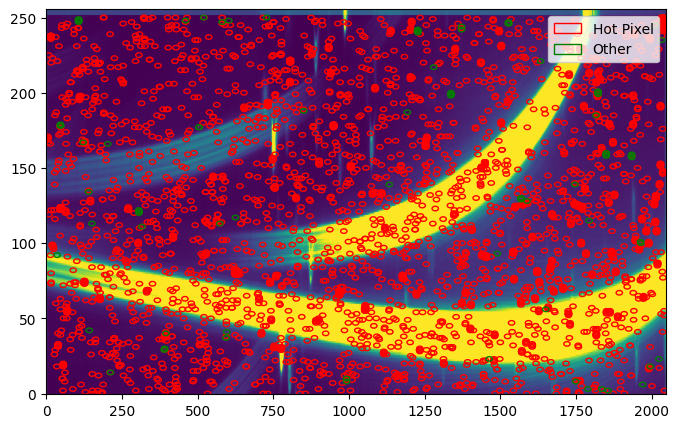

In [10]:
Image(filename=outdir_s2 + 'badpixstep.png')

In [11]:
step = stage2.PCAReconstructStep(results, baseline_ints=[150, -100], output_dir=outdir_s2)


results, deepframe = step.run(save_results=True, force_redo=True, do_plot=True, pca_components=10,
                              remove_components=None)

2025-08-22 13:03:58.513 - exoTEDRF - INFO - PCAReconstructStep instance created.
2025-08-22 13:03:58.513 - exoTEDRF - WARNING - The PCA can be memory intensive, especially for large datasets.
2025-08-22 13:03:58.513 - exoTEDRF - WARNING - If you run into memory issues, the PCA component of this step can be skipped by specifying skip_pca=True.
2025-08-22 13:03:58.513 - exoTEDRF - INFO - Starting PCA Reconstruction Step.
2025-08-22 13:03:59.502 - exoTEDRF - INFO - Calculating TSO stability.
2025-08-22 13:04:07.921 - exoTEDRF - INFO - Plotting PCA outputs.
2025-08-22 13:04:10.552 - exoTEDRF - INFO - Plot saved to /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/stability_pca.png
2025-08-22 13:04:11.761 - exoTEDRF - INFO - Generating a deep stack for the TSO.
2025-08-22 13:04:25.634 - exoTEDRF - INFO - Deepframe saved to file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001_nis_deepframe.fits.
2025-08-22 13:04:25.634 - exoTED

In [12]:
pixel_masks = [outdir_s1 + f"{observation_id}_04102_00001-seg001_nis_pixelflags.fits",
                outdir_s1 + f"{observation_id}_04102_00001-seg002_nis_pixelflags.fits",
                outdir_s1 + f"{observation_id}_04102_00001-seg003_nis_pixelflags.fits",
                outdir_s1 + f"{observation_id}_04102_00001-seg004_nis_pixelflags.fits",
                outdir_s1 + f"{observation_id}_04102_00001-seg005_nis_pixelflags.fits",
                ]

step = stage2.TracingStep(results, deepframe=deepframe, generate_order0_mask=False,
                          generate_lc=True, baseline_ints=[150, -100],
                          output_dir=outdir_s2)

step_results = step.run(pixel_flags=pixel_masks, save_results=True, force_redo=True,
                        do_plot=True)

2025-08-22 13:04:25.643 - exoTEDRF - INFO - Reading deepframe file: /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001_nis_deepframe.fits...
2025-08-22 13:04:25.647 - exoTEDRF - INFO - TracingStep instance created.
2025-08-22 13:04:25.647 - exoTEDRF - INFO - Starting Tracing Step.


2025-08-22 13:05:06,476 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.


2025-08-22 13:05:06.469 - exoTEDRF - INFO - Finding trace centroids.
2025-08-22 13:05:07.829 - exoTEDRF - INFO - Centroids saved to /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001_nis_centroids.csv
2025-08-22 13:05:08.107 - exoTEDRF - INFO - Generating a smoothed light curve
2025-08-22 13:05:08.111 - exoTEDRF - INFO - Smoothed light curve saved to /data/typhon2/hattie/jwst/wasp_17/pipeline_outputs_directory/Stage2/jw01353101001_04101_00001_nis_lcestimate.npy
2025-08-22 13:05:08.116 - exoTEDRF - INFO - Step TracingStep done.


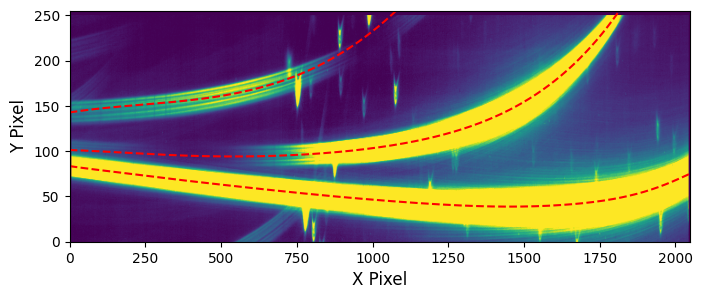

In [13]:

Image(filename=outdir_s2 + 'centroiding.png')

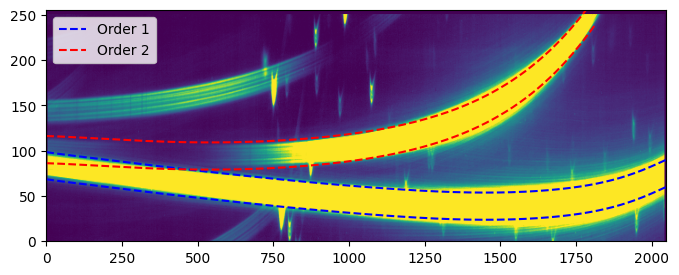

In [14]:

centroids = pd.read_csv(outdir_s2 + f"{observation_id}_04101_00001_nis_centroids.csv", comment='#')
deepframe = fits.getdata(deepframe)
# Display the deepframe and the trace positions.

plt.figure(figsize=(8, 3))
plt.imshow(deepframe, aspect='auto', origin='lower', vmin=0, vmax=10)

# Show a width of 30 pixels around the trace.
plt.plot(centroids['xpos'], centroids['ypos o1']+15, ls='--', c='blue', label='Order 1')
plt.plot(centroids['xpos'], centroids['ypos o1']-15, ls='--', c='blue')
plt.plot(centroids['xpos'], centroids['ypos o2']+15, ls='--', c='red', label='Order 2')
plt.plot(centroids['xpos'], centroids['ypos o2']-15, ls='--', c='red')

plt.legend()
plt.ylim(0, 255)
plt.show()